In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#đọc dữ liệu 
dataset = pd.read_csv("/content/Mall_Customers.csv", sep=";")
dataset.head(10) 

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
dataset = dataset.drop(['CustomerID'], axis=1)
#chuẩn hoá lại dữ liệu cột giới tính nam gán = 1, nữ gán = 0
for i in range(len(dataset['Genre'])):
  if dataset['Genre'][i] == 'Male':
    dataset['Genre'][i] = 1
  else:
     dataset['Genre'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df = dataset 
df = df.dropna()
print(df)

    Genre  Age  AnnualIncome  SpendingScore
0       1   19            15             39
1       1   21            15             81
2       0   20            16              6
3       0   23            16             77
4       0   31            17             40
..    ...  ...           ...            ...
195     0   35           120             79
196     0   45           126             28
197     1   32           126             74
198     1   32           137             18
199     1   30           137             83

[200 rows x 4 columns]


In [ ]:
#mô hình dự đoán SpendingScore khi biết AnnualIncome
from sklearn import datasets, linear_model

X_train_linear = df.loc[:,['AnnualIncome']].values
Y_train_linear = df['SpendingScore'].values

# fit the model by Linear Regression
regr_SpendingScore = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr_SpendingScore.fit(X_train_linear, Y_train_linear)

# Compare two results
print(regr_SpendingScore.coef_ )
print(regr_SpendingScore.score(X_train_linear,Y_train_linear))
print(f"Phương trình hồi quy: [SpendingScore]={regr_SpendingScore.coef_ }x[AnnualIncome]+{regr_SpendingScore.score(X_train_linear,Y_train_linear)}")

[0.69978525]
-0.5846663238617607
Phương trình hồi quy: [SpendingScore]=[0.69978525]x[AnnualIncome]+-0.5846663238617607


In [ ]:
##mô hình dự đoán AnnualIncome khi biết SpendingScore
from sklearn import datasets, linear_model

X_train_linear = df.loc[:,['SpendingScore']].values
Y_train_linear = df['AnnualIncome'].values

# fit the model by Linear Regression
regr_AnnualIncome = linear_model.LinearRegression() 
regr_AnnualIncome.fit(X_train_linear, Y_train_linear)

# Compare two results
print(regr_AnnualIncome.coef_ )
print(regr_AnnualIncome.score(X_train_linear,Y_train_linear))
print(f"Phương trình hồi quy: [AnnualIncome]={regr_AnnualIncome.coef_ }x[SpendingScore]+{regr_AnnualIncome.score(X_train_linear,Y_train_linear)}")

[0.01007204]
9.806640037368641e-05
Phương trình hồi quy: [AnnualIncome]=[0.01007204]x[SpendingScore]+9.806640037368641e-05


In [ ]:
meanAnnualIncome = dataset['AnnualIncome'].mean()
meanSpendingScore = dataset['SpendingScore'].mean()
meanAge = dataset['Age'].mean()

In [ ]:
df['Genre'].value_counts()

0    112
1     88
Name: Genre, dtype: int64

In [ ]:
#chuẩn hoá dữ liệu null
for i in range(len(dataset)):
  if str(dataset['AnnualIncome'][i]) == 'nan':
    temp = dataset['SpendingScore'][i]
    dataset['AnnualIncome'][i] = regr_AnnualIncome.predict([[temp]])[0]
  if str(dataset['SpendingScore'][i]) == 'nan':
    temp = dataset['AnnualIncome'][i]
    dataset['SpendingScore'][i] = regr_SpendingScore.predict([[temp]])[0]
  if (str(dataset['AnnualIncome'][i]) == 'nan') and (str(dataset['SpendingScore'][i]) == 'nan'):
    dataset['AnnualIncome'][i] = meanAnnualIncome
    dataset['SpendingScore'][i] = meanSpendingScore
  if str(dataset['Age'][i]) == 'nan':
    dataset['Age'][i] = meanAge
  if str(dataset['Genre'][i]) == 'nan':
    dataset['Genre'][i] = 0

In [ ]:
X= dataset.values
X = np.array(X, dtype=np.float64)

In [ ]:
X

In [ ]:
class KMeans:
    def __init__(self, n_clusters=5):
        self.K = n_clusters
        
    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
        
    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt((np.sum(((self.centroids - x)**2), axis=1))))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)

In [ ]:
kmeans.labels

array([4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
kmeans.centroids

array([[  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.60714286,  40.17857143,  78.89285714,  17.42857143],
       [  0.45      ,  32.875     ,  86.1       ,  81.525     ],
       [  0.4057971 ,  52.05797101,  46.42028986,  39.88405797],
       [  0.41509434,  25.05660377,  40.73584906,  62.62264151]])

In [ ]:
len(kmeans.centroids)

5

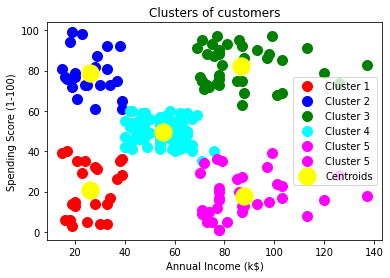

In [ ]:
#biểu diễn biểu đồ scatter 2 giá trị thu nhập hàng năm và điểm tiêu chi
plt.scatter(X[kmeans.labels == 0, 2], X[kmeans.labels == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[kmeans.labels == 1, 2], X[kmeans.labels == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[kmeans.labels == 2, 2], X[kmeans.labels == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[kmeans.labels == 3, 2], X[kmeans.labels == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[kmeans.labels == 4, 2], X[kmeans.labels == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[kmeans.labels == 5, 2], X[kmeans.labels == 5, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.centroids[:, 2], kmeans.centroids[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()